### Import Libraries

In [1]:
import numpy as chi #just for fun
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style("darkgrid")

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
    

%matplotlib inline

### Read DataSet

In [2]:
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx")
Sample_sub = pd.read_excel("Sample_Submission.xlsx")

In [4]:
train.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,2010-04-26,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,2009-06-21,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,2013-05-01,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,2015-09-28,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,2015-12-09,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [3]:
train["Date"] = pd.to_datetime(train["Date"],errors='coerce', dayfirst=True)
test["Date"] = pd.to_datetime(test["Date"],errors='coerce', dayfirst=True)

### Basic EDA

In [4]:
train.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results'],
      dtype='object')

In [8]:
train.shape

(147443, 15)

In [9]:
train.nunique()

ID                    147443
Date                    2507
LicenseNo              34384
FacilityID             25535
FacilityName           24348
Type                     409
Street                 17290
City                       2
State                      2
LocationID               104
Reason                    17
SectionViolations         61
RiskLevel                  4
Geo_Loc                16316
Inspection_Results         7
dtype: int64

In [7]:
test.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc'],
      dtype='object')

In [14]:
dataset = [train, test]

for data in dataset:
    for d in range(len(data.columns))[ : -1]:
        print(data.columns[d] + ": " + str(data[data.columns[d]].isna().sum()))
        print(test.columns[d] + ":" + str(test[test.columns[d]].isna().sum()))
        print('________________________________')

ID: 0
ID:0
________________________________
Date: 0
Date:0
________________________________
LicenseNo: 0
LicenseNo:0
________________________________
FacilityID: 0
FacilityID:0
________________________________
FacilityName: 0
FacilityName:0
________________________________
Type: 3485
Type:1215
________________________________
Street: 0
Street:0
________________________________
City: 0
City:0
________________________________
State: 0
State:0
________________________________
LocationID: 35
LocationID:15
________________________________
Reason: 0
Reason:0
________________________________
SectionViolations: 39068
SectionViolations:12976
________________________________
RiskLevel: 0
RiskLevel:0
________________________________
Geo_Loc: 0
Geo_Loc:0
________________________________
ID: 0
ID:0
________________________________
Date: 0
Date:0
________________________________
LicenseNo: 0
LicenseNo:0
________________________________
FacilityID: 0
FacilityID:0
________________________________
Faci

In [ ]:
#empty = train[train["SectionViolations"].isnull()]; empty

In [ ]:
#empty1 = train[train["Type"].isna()];empty1

In [ ]:
#empty2 = train[train["LocationID"].isna()];empty2

### Fill Null values

In [4]:
# dataset = [train, test]
# Train Set
train["Type"].fillna("UNKNOWN",  inplace = True)
train["LocationID"].fillna(-99,  inplace = True)
train["SectionViolations"].fillna(-99, inplace = True)

# Test Set
test["Type"].fillna("UNKNOWN",  inplace = True)
test["LocationID"].fillna(-99,  inplace = True)
test["SectionViolations"].fillna(-99, inplace = True)

In [16]:
print(train.isnull().sum())
print(test.isnull().sum())

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64
ID                   0
Date                 0
LicenseNo            0
FacilityID           0
FacilityName         0
Type                 0
Street               0
City                 0
State                0
LocationID           0
Reason               0
SectionViolations    0
RiskLevel            0
Geo_Loc              0
dtype: int64


### Preprocessing

In [5]:
dataset = [train, test]

#from sklearn.preprocessing import LabelEncoder
for data in dataset:
    #le = LabelEncoder()
    #data.RiskLevel = le.fit_transform(data.RiskLevel)
    data["RiskLevel"].replace(to_replace = ["High", "Medium", "Low", "Uncertain"], value = [3, 2, 1, 0], inplace = True)

In [32]:
#pd.crosstab(train.SectionViolations, train.City)

In [29]:
train.Reason.value_counts().to_frame()

,Reason
CANVASS,77943
LICENSE,19645
CANVASS RE-INSPECTION,15705
COMPLAINT,13572
LICENSE RE-INSPECTION,6796
COMPLAINT RE-INSPECTION,5655
SHORT FORM COMPLAINT,5094
SUSPECTED FOOD POISONING,631
CONSULTATION,503
TAG REMOVAL,456


In [6]:
train['New_city_num']   = train.City.str.split("-", expand = True)[1]
train['New_state_num']   = train.State.str.split("_", expand = True)[1]
train['New_geo_num']   = train.Geo_Loc.str.split("d", expand = True)[1]

In [7]:
test['New_city_num']   = test.City.str.split("-", expand = True)[1]
test['New_state_num']   = test.State.str.split("_", expand = True)[1]
test['New_geo_num']   = test.Geo_Loc.str.split("d", expand = True)[1]

In [30]:
train.isnull().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
New_city_num          0
New_state_num         0
New_geo_num           0
dtype: int64

In [28]:
# New = 
# New1 = train.State.str.split("_", expand = True)
# New2 = train.Geo_Loc.str.split("d", expand = True)
    
# New = test.City.str.split("-", expand = True)
# New1 = test.State.str.split("_", expand = True)
# New2 = test.Geo_Loc.str.split("d", expand = True)
    
# train["New_city_id"] = New[0]
# train["New_city_num"] = New[1]
# train["New_State_id"] = New1[0]
# train["New_State_num"] = New1[1]
# train["New_Geo_loco"] = New2[0]
# train["New_Geo_loci"] = New2[1]
    
# test["New_city_id"] = New[0]
# test["New_city_num"] = New[1]
# test["New_State_id"] = New1[0]
# test["New_State_num"] = New1[1]
# test["New_Geo_loco"] = New2[0]
# test["New_Geo_loci"] = New2[1]

### Time based Preprocessing

In [8]:
attr = ["Hour","Year", 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear','quarter',"weekday_name",
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

for n in attr: 
    train[n] = getattr(train.Date.dt, n.lower())
    test[n] = getattr(test.Date.dt, n.lower())

train['Elapsed'] = train.Date.astype(chi.int64) // 10 ** 9
test['Elapsed'] = test.Date.astype(chi.int64) // 10 ** 9

In [13]:
train.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,New_city_num,New_state_num,New_geo_num,Hour,Year,Month,Week,Day,Dayofweek,Dayofyear,quarter,weekday_name,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,31103489027986,2010-04-26,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,3,locid16406,4,11235901,1890134,16406,0.0,2010.0,4.0,17.0,26.0,0.0,116.0,2.0,Monday,False,False,False,False,False,False,1272240000
1,10088999935915,2009-06-21,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,3,locid878,4,11235901,1890134,878,0.0,2009.0,6.0,25.0,21.0,6.0,172.0,2.0,Sunday,False,False,False,False,False,False,1245542400
2,40148966010272,2013-05-01,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,-99.0,3,locid3368,6,11235901,1890134,3368,0.0,2013.0,5.0,18.0,1.0,2.0,121.0,2.0,Wednesday,False,True,False,False,False,False,1367366400
3,37157708563676,2015-09-28,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,2,locid11839,4,11235901,1890134,11839,0.0,2015.0,9.0,40.0,28.0,0.0,271.0,3.0,Monday,False,False,False,False,False,False,1443398400
4,47478049564374,2015-12-09,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,3,locid12264,4,11235901,1890134,12264,0.0,2015.0,12.0,50.0,9.0,2.0,343.0,4.0,Wednesday,False,False,False,False,False,False,1449619200


In [9]:
for col in test.columns:
    test[col].fillna(-999,  inplace = True)
    train[col].fillna(-999,  inplace = True)

In [33]:
# train.Type.unique()

In [34]:
train.dtypes

ID                      int64
Date                   object
LicenseNo               int64
FacilityID              int64
FacilityName            int64
Type                   object
Street                  int64
City                   object
State                  object
LocationID            float64
Reason                 object
SectionViolations     float64
RiskLevel               int64
Geo_Loc                object
Inspection_Results      int64
New_city_num           object
New_state_num          object
New_geo_num            object
dtype: object

In [19]:
train.sample(n = 5)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
70280,42512968536202,23-06-2015,37347,16266,15516,RESTAURANT,7346,id-11235901,id_1890134,81853.0,CANVASS,33.0,High,locid4909,4
89027,43582723838795,24-03-2014,33910,14431,13744,SCHOOL,7516,id-11235901,id_1890134,81857.0,CANVASS,35.0,Medium,locid7948,4
51314,42623197726390,08-12-2014,5586,25133,23990,GROCERY STORE,6055,id-11235901,id_1890134,81857.0,CANVASS RE-INSPECTION,21.0,Medium,locid7792,5
95678,31390373284742,26-05-2016,22412,3418,3212,CHILDREN'S SERVICES FACILITY,16990,id-11235901,id_1890134,81862.0,LICENSE,11.0,High,locid1480,5
108960,35286993900336,26-12-2016,2100,9199,8721,GROCERY STORE,14526,id-11235901,id_1890134,81857.0,CANVASS RE-INSPECTION,32.0,Medium,locid6489,4


In [36]:
train.shape, test.shape

((147443, 18), (49148, 17))

In [37]:
# ty = train.Type.unique();ty.shape

In [15]:
print(train.dtypes)
print(test.dtypes)

ID                      int64
Date                   object
LicenseNo               int64
FacilityID              int64
FacilityName            int64
Type                   object
Street                  int64
City                   object
State                  object
LocationID            float64
Reason                 object
SectionViolations     float64
RiskLevel               int64
Geo_Loc                object
Inspection_Results      int64
New_city_num           object
New_state_num          object
New_geo_num            object
Hour                  float64
Year                  float64
Month                 float64
Week                  float64
Day                   float64
Dayofweek             float64
Dayofyear             float64
quarter               float64
weekday_name           object
Is_month_end             bool
Is_month_start           bool
Is_quarter_end           bool
Is_quarter_start         bool
Is_year_end              bool
Is_year_start            bool
Elapsed   

In [ ]:
# for data in dataset:
#     data["NumberOfWindows"] = data["NumberOfWindows"].apply(pd.to_numeric, errors='coerce')
#     data["Geo_Code"] = data["Geo_Code"].apply(pd.to_numeric, errors = "coerce")

In [39]:
train.corr()["Inspection_Results"]

ID                   -0.006987
LicenseNo            -0.042021
FacilityID           -0.004908
FacilityName         -0.004162
Street               -0.004127
LocationID           -0.002623
SectionViolations    -0.203413
RiskLevel            -0.037779
Inspection_Results    1.000000
Name: Inspection_Results, dtype: float64

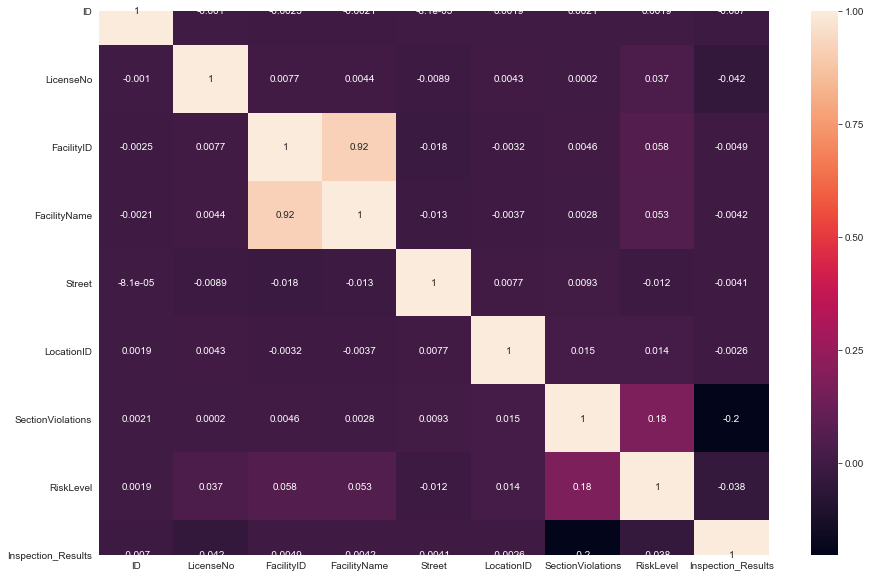

In [40]:
plt.figure(figsize = [15, 10])
sns.heatmap(train.corr(), annot = True)

In [41]:
# feats_to_drop = ["ID", "Date", "LicenseNo", "New_city_id", "New_State_id", "New_Geo_loco", "City", "State", "Geo_Loc"]


# train.drop(feats_to_drop, axis = 1, inplace = True)

In [42]:
train.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,New_city_num,New_state_num,New_geo_num
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,3,locid16406,4,11235901,1890134,16406
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,3,locid878,4,11235901,1890134,878
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,-99.0,3,locid3368,6,11235901,1890134,3368
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,2,locid11839,4,11235901,1890134,11839
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,3,locid12264,4,11235901,1890134,12264


In [43]:
train.isnull().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
New_city_num          0
New_state_num         0
New_geo_num           0
dtype: int64

In [80]:
train.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results', 'New_city_num',
       'New_state_num', 'New_geo_num', 'Hour', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'quarter', 'weekday_name', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'Elapsed'],
      dtype='object')

In [10]:
train_col = [col for col in train.columns if col not in ["ID", "Date", "Inspection_Results","Hour"]]

In [11]:
#X = train[["FacilityID", "FacilityName", "Type", "Street", "LocationID", "Reason", "RiskLevel", "New_city_num", "New_state_num", "New_geo_num"]]
X = train[train_col]
Y = train["Inspection_Results"]

In [18]:
X.shape

(147443, 30)

In [107]:
train.isnull().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
New_city_num          0
New_state_num         0
New_geo_num           0
Hour                  0
Year                  0
Month                 0
Week                  0
Day                   0
Dayofweek             0
Dayofyear             0
quarter               0
weekday_name          0
Is_month_end          0
Is_month_start        0
Is_quarter_end        0
Is_quarter_start      0
Is_year_end           0
Is_year_start         0
Elapsed               0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [12]:
cat_feats_index = chi.where(X.dtypes != float)[0];cat_feats_index

array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14, 22, 23, 24, 25,
       26, 27, 28, 29], dtype=int64)

In [13]:
from catboost import CatBoostClassifier, Pool,cv
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, accuracy_score


In [23]:
classifier.fit(x_train, y_train, cat_features = cat_feats_index, eval_set = (x_val, y_val))

0:	learn: 1.2459236	test: 1.2483581	best: 1.2483581 (0)	total: 4.36s	remaining: 36m 16s
1:	learn: 1.0138141	test: 1.0177090	best: 1.0177090 (1)	total: 5.62s	remaining: 23m 20s
2:	learn: 0.8746686	test: 0.8787779	best: 0.8787779 (2)	total: 6.74s	remaining: 18m 37s
3:	learn: 0.7810860	test: 0.7855552	best: 0.7855552 (3)	total: 8.7s	remaining: 17m 58s
4:	learn: 0.7078057	test: 0.7120349	best: 0.7120349 (4)	total: 9.73s	remaining: 16m 3s
5:	learn: 0.6528751	test: 0.6566331	best: 0.6566331 (5)	total: 10.4s	remaining: 14m 15s
6:	learn: 0.6118668	test: 0.6154244	best: 0.6154244 (6)	total: 11.1s	remaining: 12m 59s
7:	learn: 0.5817773	test: 0.5852810	best: 0.5852810 (7)	total: 11.8s	remaining: 12m 4s
8:	learn: 0.5558157	test: 0.5593677	best: 0.5593677 (8)	total: 12.7s	remaining: 11m 33s
9:	learn: 0.5377869	test: 0.5413098	best: 0.5413098 (9)	total: 13.6s	remaining: 11m 8s
10:	learn: 0.5226999	test: 0.5263642	best: 0.5263642 (10)	total: 14.6s	remaining: 10m 47s
11:	learn: 0.5058415	test: 0.50939

In [24]:
t_pred = classifier.predict(x_val)

In [25]:
accuracy_score(y_val, t_pred)

0.8778965930413944

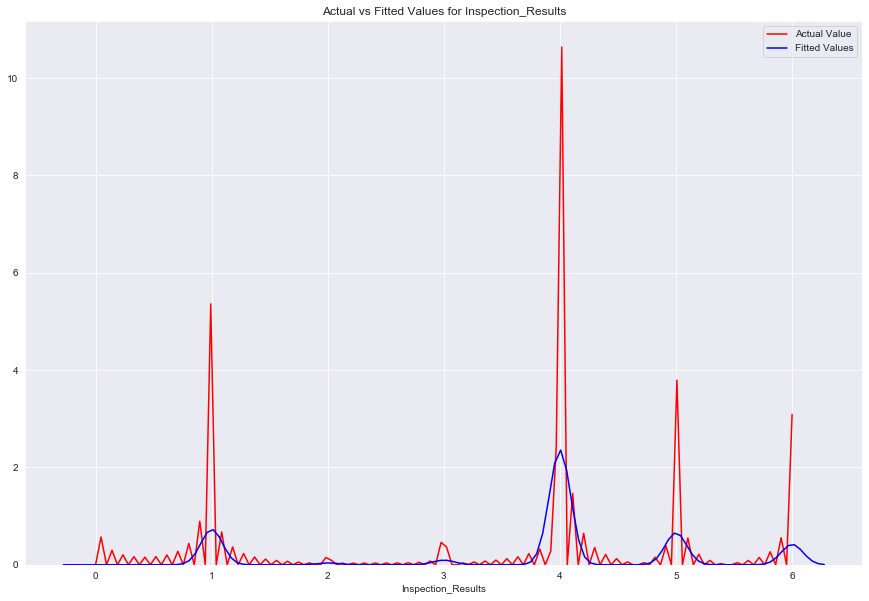

In [26]:
plt.figure(figsize=(15,10))


ax1 = sns.distplot(y_val, hist=False, color="r", label="Actual Value")
sns.distplot(t_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Inspection_Results')
#plt.xlabel('Price (in dollars)')
#plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [115]:
#checking feature importance
fi = pd.Series(classifier.feature_importances_, index = X.columns).sort_values(ascending = False)
fi

SectionViolations    48.728202
Year                 12.804326
Reason               12.242342
Type                  4.273244
Elapsed               3.746436
LicenseNo             3.635383
Geo_Loc               2.994963
FacilityName          2.678408
FacilityID            2.150125
LocationID            1.819629
RiskLevel             1.165688
Dayofyear             1.000009
Street                0.993812
weekday_name          0.667384
Day                   0.485083
Dayofweek             0.241460
Week                  0.144212
Month                 0.126426
New_geo_num           0.079676
Is_month_start        0.020196
Is_quarter_end        0.001339
Is_quarter_start      0.001260
Is_year_end           0.000396
New_city_num          0.000000
New_state_num         0.000000
State                 0.000000
City                  0.000000
Is_year_start         0.000000
quarter               0.000000
Is_month_end          0.000000
dtype: float64

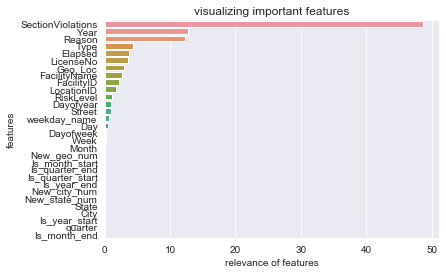

In [116]:
sns.barplot(x = fi, y = fi.index)
plt.xlabel("relevance of features")
plt.ylabel("features")
plt.title("visualizing important features")
#plt.legend()
plt.show()

In [117]:
fi.index

Index(['SectionViolations', 'Year', 'Reason', 'Type', 'Elapsed', 'LicenseNo',
       'Geo_Loc', 'FacilityName', 'FacilityID', 'LocationID', 'RiskLevel',
       'Dayofyear', 'Street', 'weekday_name', 'Day', 'Dayofweek', 'Week',
       'Month', 'New_geo_num', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'New_city_num', 'New_state_num',
       'State', 'City', 'Is_year_start', 'quarter', 'Is_month_end'],
      dtype='object')

In [17]:
test_col = [col for col in test.columns if col not in ["ID", "Date", "Inspection_Results","Hour",
                                                      'New_city_num', 'New_state_num',
                                                       'State', 'City', 'Is_year_start', 'quarter', 'Is_month_end']]
Xt = test[test_col]

### Model Training

In [16]:
# from sklearn.model_selection import StratifiedKFold

# accCBC = []
# CBC_preds = []
# skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
# i = 1
# for train_index, val_index in skf.split(X, Y):  
#     X_train, X_val = X[train_index], X[val_index] 
#     Y_train, Y_val = Y[train_index], Y[val_index]
#     CBC = CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=4,learning_rate=0.1,
#                               subsample=0.9,bootstrap_type='Bernoulli', use_best_model=True)
#     CBC.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_val, Y_val)], early_stopping_rounds=100,verbose=100)
#     CBC_pred = CBC.predict_proba(X_val)[:, 1]
#     print("accuracy: ", roc_auc_score(Y_val, CBC_pred))
#     accCBC.append(roc_auc_score(Y_val, CBC_pred))
#     C = CBC.predict_proba(Xt)
#     CBC_preds.append(C)[:, 1]

In [18]:
cat_feats_index = chi.where(test[test_col].dtypes != float)[0];cat_feats_index

array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 17, 18, 19, 20, 21, 22],
      dtype=int64)

In [19]:
CBC = CatBoostClassifier(n_estimators=500, max_depth=4,learning_rate=0.1,
                              subsample=0.9,bootstrap_type='Bernoulli')
CBC.fit(train[test_col], Y, cat_features = cat_feats_index, early_stopping_rounds=100, verbose=100)

0:	learn: 1.5662080	total: 1.3s	remaining: 10m 48s
100:	learn: 0.3666441	total: 1m 54s	remaining: 7m 31s
200:	learn: 0.3318508	total: 4m 1s	remaining: 5m 59s
300:	learn: 0.3162117	total: 6m 9s	remaining: 4m 4s
400:	learn: 0.3077092	total: 8m 17s	remaining: 2m 2s
499:	learn: 0.3016998	total: 10m 16s	remaining: 0us


In [20]:
CBC_preds = CBC.predict_proba(Xt)

In [23]:
subm = pd.DataFrame(CBC_preds, columns = Sample_sub.columns)
subm.head()

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,6.094420e-06,0.937811,0.000311,0.000974,0.003911,0.055859,0.001127
1,2.279896e-06,0.005233,0.000008,0.000044,0.992805,0.001879,0.000030
2,3.730113e-04,0.010610,0.001437,0.823763,0.044948,0.001381,0.117488
3,3.872033e-03,0.144683,0.000141,0.004541,0.153113,0.002287,0.691362
4,3.758538e-07,0.004679,0.000012,0.000180,0.989825,0.005126,0.000177


In [143]:
# Y_val

CBC_preds.shape
# [:, 1]

(49148, 7)

In [150]:
Sample_sub.columns

Index(['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN'],
      dtype='object')

In [28]:
subm.to_excel("CHINAZO_SUBMISSION.xlsx", index = False)